# Imports

In [1]:
from bsc_package import *
# from carfac_orig import *
import os
import sys
import pickle

### Sinusoidal Signal

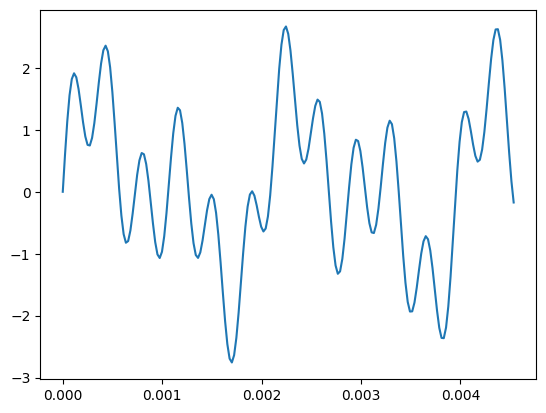

In [2]:
# frequency = 1000
# sampling_rate = 42000
# duration = 0.5
# time = np.arange(0, duration, 1/(sampling_rate))
# signal = np.sin(2 * np.pi * frequency * time)



def generate_multi_sine_wave(duration, frequencies, amplitudes, sampling_rate):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = np.sum([amplitude * np.sin(2 * np.pi * frequency * t) for frequency, amplitude in zip(frequencies, amplitudes)], axis=0)
    return t, signal

# Parameters
duration = 1  # seconds
frequencies = [500, 1000, 2800, 15000]  # Hz
amplitudes = [1, 1, 1]
sampling_rate = 44100  # Hz

time, signal = generate_multi_sine_wave(duration, frequencies, amplitudes, sampling_rate)

plt.plot(time[:201], signal[:201]);
plt.show()

In [3]:
# dur = 1
# signal, sr = librosa.load("Resources/Soundfiles/Wow_quest_complete.mp3", sr=44100, duration=dur)

# signal = signal/np.max(signal)

# time = np.arange(0, dur, 1/sr)


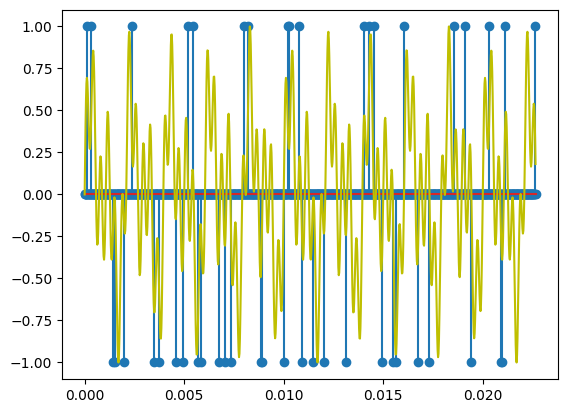

In [4]:
del_t = 0.001

seed(9)

signal = signal/np.max(signal)

spike_train = np.zeros(np.size(time))

poisson = np.random.poisson(3.0, size=int(np.size(spike_train)))

for i in range(np.size(time)):

    if signal[i] < 0 and poisson[i] <= -1*signal[i]:
        spike_train[i] = - 1
    elif signal[i] > 0 and poisson[i] <= signal[i]:
        spike_train[i] = 1
    else:
        spike_train[i] = 0

    # print(poisson[i])

# for i in range(np.size(spike_train)):
#     if i%4 == 0:
#         spike_train[i] = 0

# plt.stem(time[32300:32600], spike_train[32300:32600])
# plt.plot(time[32300:32600], signal[32300:32600], color='y')
# plt.show()

plt.stem(time[:1000], spike_train[:1000])
plt.plot(time[:1000], signal[:1000], color='y')
plt.show()

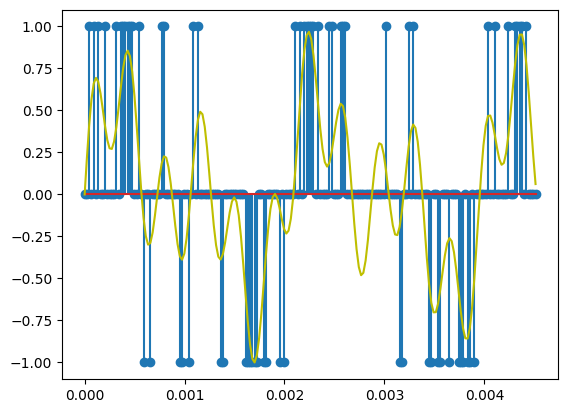

In [5]:

def calc_spike_train(time, signal):

    spike_train = np.zeros(np.size(time))

    for i in range(np.size(time)):
        
        r = random()

        if signal[i] > 0 and signal[i] > r :
            spike_train[i] = 1

        elif signal[i] < 0 and -1*signal[i] > r:
            spike_train[i] = -1

        else: spike_train[i] = 0

    return spike_train

spike_train1 = calc_spike_train(time, signal)


plt.stem(time[:200], spike_train1[:200])
plt.plot(time[:200], signal[:200], color='y')
plt.show()

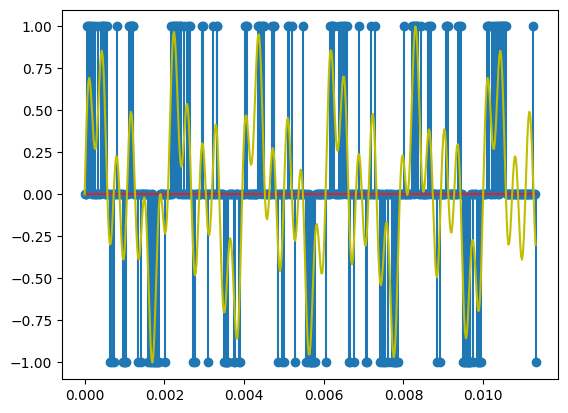

In [6]:
import random
import numpy as np
import math
# Takes in pixel and returns spike train
def rateCodingRandPix2Spike(pVal,tu):
    spikeTrain = [ 1 if pVal > random.random() else -1 if -1*pVal > random.random()  else 0 for i in range(tu)]
    return np.asarray(spikeTrain)
# Normalizes 2d image between 0 and 1
def norm2D(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))
def rateCodingRand2D(signal):
    # 1. Normalize the input image
    image = signal/np.max(signal)
    # 2. Set a firing rate, T
    T = 1  # Set to spike train interval 100ms
    # 3. Using T obtain time axis 
    dt = 1  # (T = 100ms -> dt = 1000ms/100 = 1ms)
    bins = int(T / dt)  # time axis length of 100 units
    # random.seed(9)
    # 4. For each normalized pixel value in , pVal, in image and for each 
    # time unit T, generate a random number, r from range (0,1). 
    # If pVal > r then store a spike at that time instant otherwise 0.
    spikeTrainOut = 0
    for x in image:
        spikeTrain = rateCodingRandPix2Spike(x,bins)
        # print('Normal val',x,'fired on',(len([i for i in spikeTrain if i == 1]))/bins,'%')
        spikeTrainOut = np.hstack((spikeTrainOut, spikeTrain))

    return spikeTrainOut


spktrn = rateCodingRand2D(signal)


plt.stem(time[:500], spktrn[:500])
plt.plot(time[:500], signal[:500], color='y')
plt.show()


In [7]:
# spike_train1 = calc_spike_train(time, signal)


# plt.stem(time[:100], spike_train1[:100])
# plt.plot(time[:100], signal[:100], color='y')
# plt.show()

# TEST WITH SNNTORCH

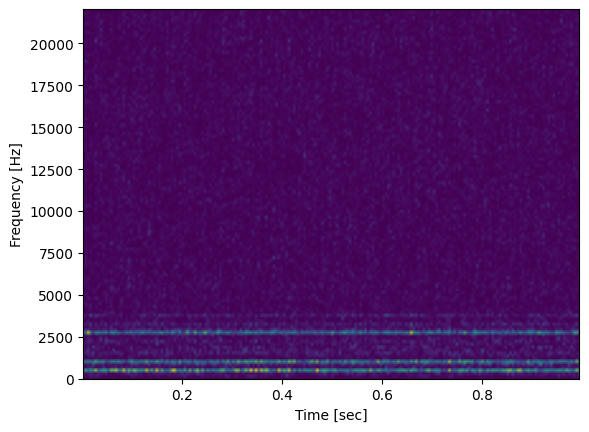

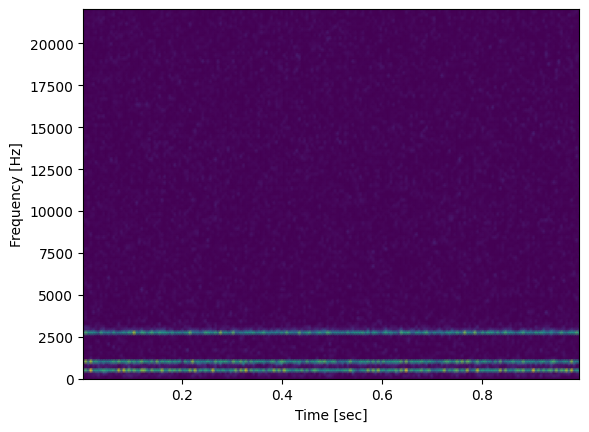

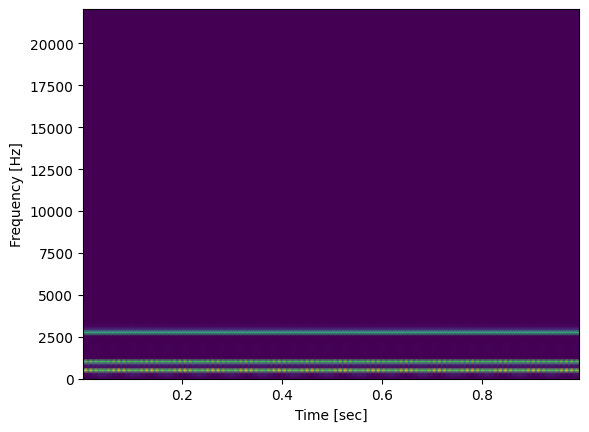

In [8]:
from snntorch import spikegen
import torch

plt.plot(time[:100], signal[:100], color = "y")

num_steps = sampling_rate * duration
# Spiking Data
spk_in = spikegen.rate_conv(torch.Tensor(signal))

plt.stem(time[:100], spk_in[:100])
plt.show()

f, t, Sxx = sig.spectrogram(spk_in, sampling_rate)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

f, t, Sxx = sig.spectrogram(spike_train1, sampling_rate)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

f, t, Sxx = sig.spectrogram(signal, sampling_rate)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## New approach to spike train generation - 08/04/24

## Carfac

At this point in the project we want to do the filterbank step with the continuous time signal, rather than a spike based signal. So we want to filter a signal into its frequency components and representing them as spike trains based on the period, essentially.

In [9]:
# !git clone https://github.com/google/carfac

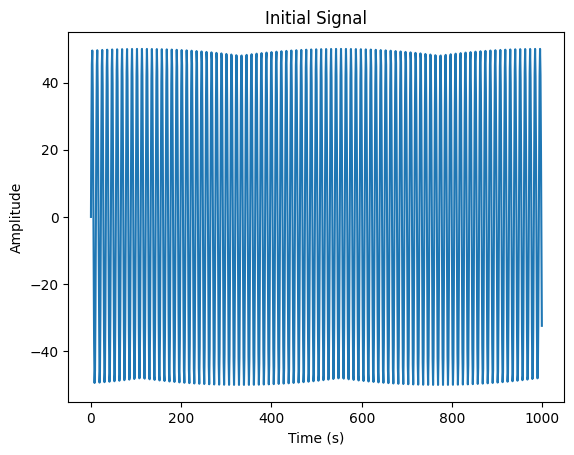

In [10]:
# sys.path.append(os.path.join('.', 'carfac/python/np'))

import carfac.python.np.carfac as carfac

dur = 0.5
fs = 44100.0

wow_sig, _ = librosa.load("Resources\Soundfiles\Wow_quest_complete.mp3", sr=fs)

wow_sig = wow_sig[20000:150000]

t, signal = generate_multi_sine_wave(duration=dur, frequencies=[1000*4], amplitudes=[50,1,1,1,1], sampling_rate=fs)

plt.plot(signal[:1000])
# plt.plot(wow_sig)
plt.title("Initial Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

plt.specgram(signal, Fs=fs, scale='dB');
plt.title("Spectrogram of initial signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

### Original Carfac implementation

In [11]:
CF = carfac.design_carfac(fs=fs)

CF = carfac.carfac_init(CF)

In [12]:
naps, _, BM, seg_ohc, seg_agc = carfac.run_segment(CF, signal)

In [13]:
plot = plt.imshow(naps[:,: , 0], aspect='auto', origin="upper")
plt.title("Carfac Channel Energy Diagram - NAPS")
plt.xlabel('Channel Number')
plt.ylabel('Time (samples)');

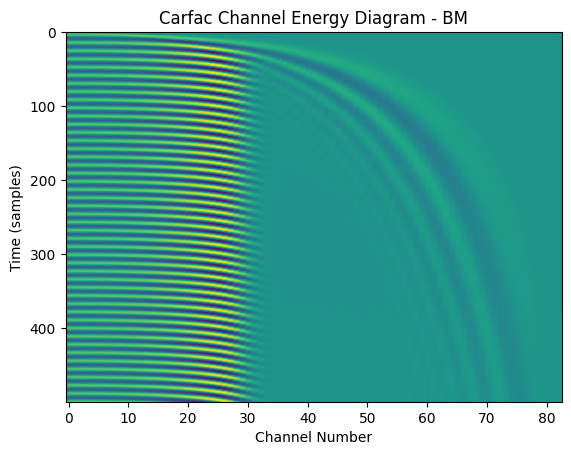

In [14]:
plt.imshow(BM[:500, :, 0], aspect='auto')
plt.title("Carfac Channel Energy Diagram - BM")
plt.xlabel('Channel Number')
plt.ylabel('Time (samples)');

Trying to plot the BM movement. Not much to notice haha

### Testing the difference between using the BM motion rather than the naps for frequency extraction

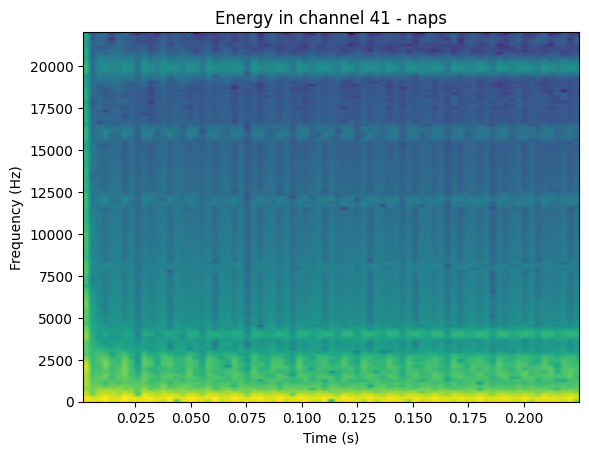

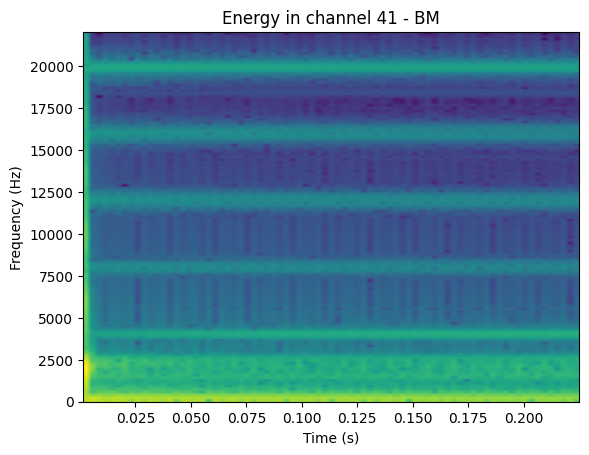

In [15]:
channel = 40

# for ch in range(70):
#     print(np.mean(naps[:10000, ch, 0]))


plt.plot(naps[:10000,:,0])
plt.title(f"Naps plottet in all channels - naps")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


plt.plot(naps[:10000,channel,0])
plt.title(f"Signal in channel {channel+1} - naps")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

plt.plot(BM[:10000,channel,0])
plt.title(f"Signal in channel {channel+1} - BM")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

plt.specgram(naps[:10000,channel,0], Fs=fs, scale='dB');
plt.title(f"Energy in channel {channel+1} - naps")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

plt.specgram(BM[:10000,channel,0], Fs=fs, scale='dB');
plt.title(f"Energy in channel {channel+1} - BM")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

### Notebook carfac implementation

Generating a file for the IR to be used without constantly re-running the code

In [16]:
# n_filt = 1000

# file_path = f"impulse_responses_CARFAC/IR_n{n_filt}.pickle"

# dur = 0.5

# IR = generate_carfac_IR(duration=dur, fs=fs, n_filters=n_filt)

# with open(file_path, 'wb') as file:
#     # Serialize and write the variable to the file
#     pickle.dump(IR, file)

# print("The variable 'data' has been saved successfully.")


Loading the desired IR file as a variable

In [17]:
IR = None

# Open the file in binary mode
with open("impulse_responses_CARFAC/" + "IR_n1000.pickle", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    IR = pickle.load(file)

print("The variable 'data' has been loaded successfully.")

The variable 'data' has been loaded successfully.


Trying out with cascading the filters, however still can't see what I'm supposed to get

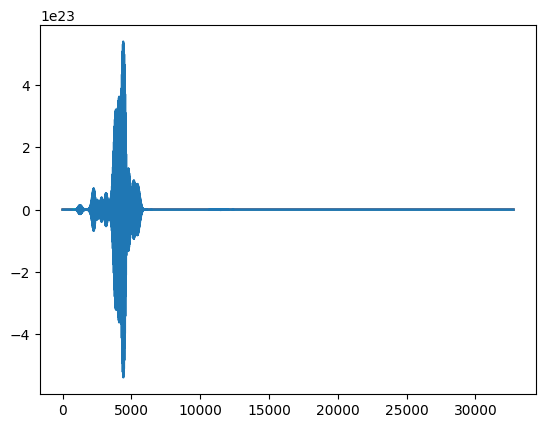

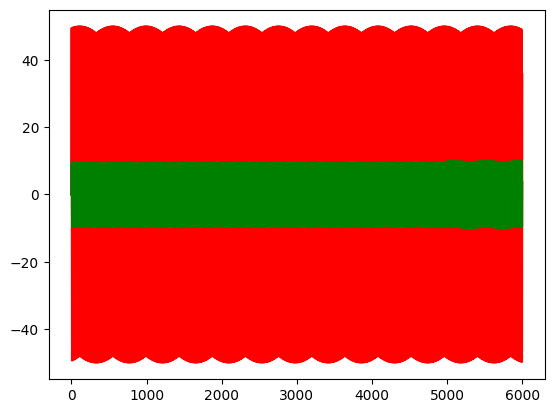

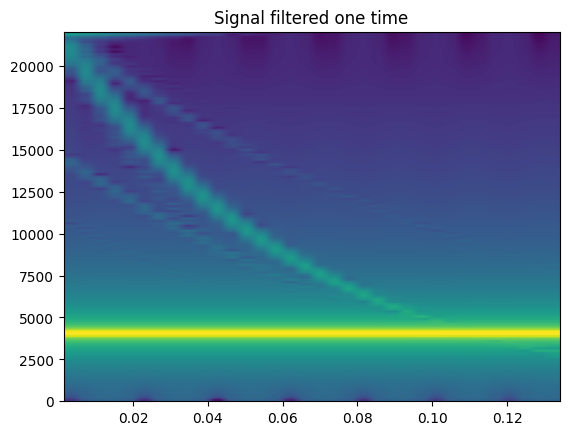

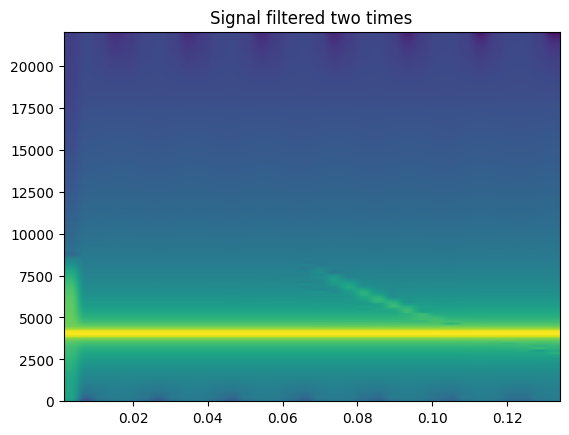

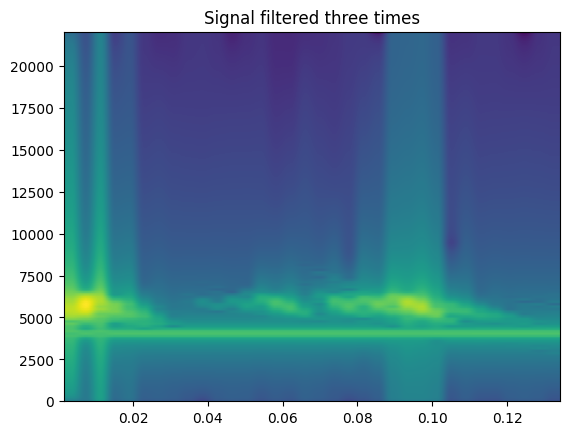

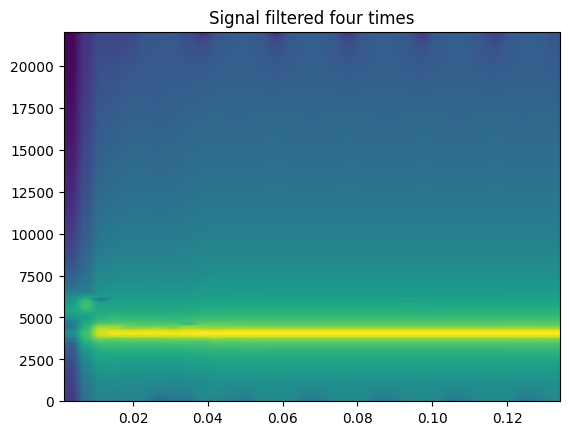

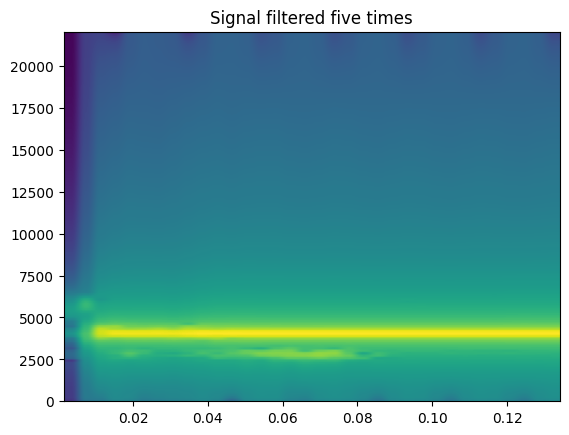

In [18]:
filt0 = sig.convolve(signal, IR[0], mode="full")
filt1 = sig.convolve(filt0, IR[100], mode="full")
filt2 = sig.convolve(filt1, IR[200], mode="full")
filt3 = sig.convolve(filt2, IR[300], mode="full")
filt4 = sig.convolve(filt3, IR[400], mode="full")

plot_range = 100000
plt.plot(IR[0, :plot_range], color="y")
plt.plot(IR[100, :plot_range], color="g")
plt.plot(IR[200, :plot_range], color="r")
plt.plot(IR[300, :plot_range], color="m")
plt.plot(IR[400, :plot_range], color="c")
plt.plot(IR[500, :plot_range])
plt.show()


plot_range = 6000
plt.plot(signal[:plot_range], color="r")
plt.plot(filt0[:plot_range], color="g")
plt.show()

plt.specgram(filt0[:plot_range], 300, Fs=fs, scale='dB');
plt.title("Signal filtered one time")
plt.show()

plt.specgram(filt1[:plot_range], 300, Fs=fs, scale='dB');
plt.title("Signal filtered two times")
plt.show()

plt.specgram(filt2[:plot_range], 300, Fs=fs, scale='dB');
plt.title("Signal filtered three times")
plt.show()

plt.specgram(filt3[:plot_range], 300, Fs=fs, scale='dB');
plt.title("Signal filtered four times")
plt.show()

plt.specgram(filt4[:plot_range], 300, Fs=fs, scale='dB');
plt.title("Signal filtered five times")
plt.show()

## Spike encoding based on magnitude sign change (09/04/24)

In [19]:
def activity_spike_converter(signal):

    currently_negative = False
    spk_trn = []

    for step in signal:
        if step <= 0:
            currently_negative = True
        
        if step > 0 and currently_negative:

            spk_trn.append(1)

            currently_negative = False

        else:

            spk_trn.append(0)
            
    return spk_trn

## WITH NEW CARFAC
spk_trn = activity_spike_converter(signal=filt1)

plot_range = 300
plt.plot(t[:plot_range], filt1[:plot_range], color="y")
plt.stem(t[:plot_range], spk_trn[:plot_range])
plt.show()

# plt.specgram(spk_trn[:plot_range], 300, Fs=fs, scale='dB');
# plt.title("Input signal")
# plt.show()

print(np.sum(spk_trn))

7922


In [20]:
## WITH ORIG CARFAC

channel = 10

spk_trn = activity_spike_converter(signal=BM[:,channel, 0])

plot_range = 1000
plt.plot(BM[:plot_range,channel, 0], color="y")
plt.stem(spk_trn[:plot_range])
plt.show()

# plt.specgram(spk_trn[:plot_range], 300, Fs=fs, scale='dB');
# plt.title("Input signal")
# plt.show()

print(np.sum(spk_trn))

mean_vals = []
max_vals = []
for c in range(len(BM[0,:,0])):
    mean_vals.append(np.mean(BM[:, c, 0]))
    max_vals.append(np.max(BM[:, c, 0]))

plt.plot(mean_vals)
plt.title("Average amplitude by channel")
plt.xlabel("Channel")
plt.ylabel("Average Amplitude")
# plt.plot(max_vals, color="g")
plt.show()

2000


Some channels has the overall magnitude increased. Is that the point?